
**Table of Contents:**
* [About the Dataset](#1)
* [Importing Modules](#2)
* [Loading Data](#3)
* [EDA - Exploratory Data Analysis](#4)
* [Data Cleaning and Feature Engineering](#5)
* [Answering Questions](#6)
* [Bribes by Cities and States](#7)
* [Bribes by Department](#8)
* [Time Series Analysis](#9)
* [Conclusion - Summary](#10)
---

<a id="1"></a> 
# 1- About the Dataset

This dataset contains information about the bribes taken from public.
All the information in this dataset is submitted by public of India.
It contains information about department which did the corruption ,date, location, amount , views of their post and amount they were forced to give.
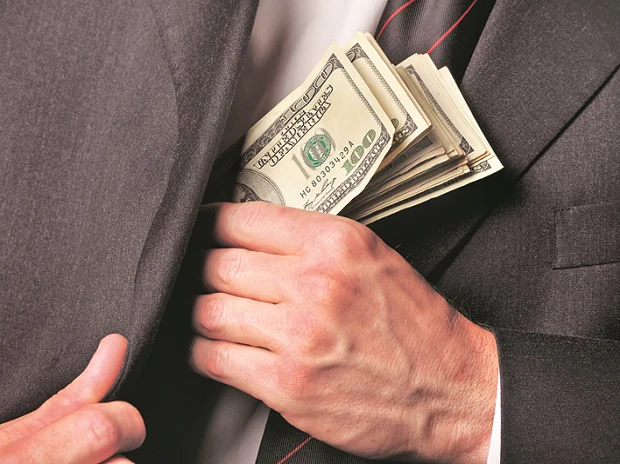

<a id="2"></a> 
# 2- Importing Modules 😀

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

<a id="3"></a> 
# 3- Loading the Data 📅

In [ ]:
df=pd.read_csv('../input/corruption/data.csv',parse_dates=["Date"])

In [ ]:
df.head()

<a id="4"></a> 
# 4 - EDA | Let's Explore 👓

In [ ]:
df.info()

In [ ]:
r,c=df.shape
print('The dataset has ',r,' rows and ',c,' columns.' )

In [ ]:
df.describe()

In [ ]:
df.describe(include=object)

In [ ]:
df.isnull().sum()

## Checking for nulls 🤔

In [ ]:
df[df['Department'].isnull()].head()

In [ ]:
df['Department'].fillna('Others',inplace=True)

In [ ]:
sns.histplot(df['Amount(INR)'],kde=True,bins=1000);
#data is highly skewed.

<a id="5"></a> 
# 5- Data Cleaning and Column Split 🤠

In [ ]:
df['Amount(INR)'].quantile(0.90)

In [ ]:
# Switching to only relevant data
df=df[df['Amount(INR)']<df['Amount(INR)'].quantile(0.90)]
#df

In [ ]:
sns.histplot(df['Amount(INR)'],kde=True);

In [ ]:
df.isnull().sum()

In [ ]:
df.sample(5)

In [ ]:
### Exploring
df.Department.unique()

In [ ]:
df[['City','Province']]=df['Location'].str.split(',',expand=True)

In [ ]:
df.head()

### There is no correlation between views and amount.

In [ ]:
sns.heatmap(df.corr(), annot=True);

<a id="6"></a> 
# 6- Answering Questions 🕵️‍♂️

# Q7 -  Most Bribes are paid in which cities?

In [ ]:
most_bribe_area=df.groupby(['City'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)

In [ ]:
most_bribe_area

In [ ]:
sns.barplot(y=most_bribe_area.index,x=most_bribe_area['count'])
plt.xlabel('Count')
plt.ylabel("Cities")
plt.title('Most Bribes taken by City?');
# Bangalore,Karnataka has the highest number of reported cases against bribery

### Q7-B- Most Bribes are paid in which states?

In [ ]:
most_bribe_province=df.groupby(['Province'])['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
sns.barplot(y=most_bribe_province.index,x=most_bribe_province['count']);

<a id="7"></a> 
# Q8- Which department gets paid the most bribe?

In [ ]:
depart_freq=df.groupby('Department')['Amount(INR)'].agg(['count','sum']).sort_values(by='count',ascending=False).head(10)
#Traffic taking the top of lists

In [ ]:
sns.barplot(y=depart_freq.index,x=depart_freq['count']);

- Traffic is higher as expected. Notice there are two bars of traffic.

**Departments which take most bribe on average and overall.**

In [ ]:
depart_sum=df.groupby('Department')['Amount(INR)'].agg(['mean','sum']).sort_values(by='sum',ascending=False).head(10)
depart_sum

In [ ]:
sns.barplot(y=depart_sum.index,x=depart_sum['sum']);

<a id="9"></a> 
# 9- Time Series Analysis ⌚⌛

In [ ]:
df_day=df[["Amount(INR)",'Date']].copy()
df_day.head()

In [ ]:
df_day["Day_of_month"]=df["Date"].dt.day
df_day["Week_of_year"]=df["Date"].dt.week
df_day["Year"]=df["Date"].dt.year
df_day["Month"]=df["Date"].dt.month
df_day['Day_of_week']=df['Date'].dt.dayofweek

In [ ]:
df_day

### Bribes paid by days of the month

In [ ]:
sns.histplot(data=df_day["Day_of_month"],bins=31)
plt.ylabel("Number of bribes taken")
plt.title("Days of the Month");

### Bribes paid by Years

In [ ]:
sns.histplot(data=df_day["Year"])
plt.ylabel("Number of bribes taken")
plt.title("Years");

In [ ]:
sns.histplot(data=df_day["Month"],bins=12)
plt.ylabel("Number of bribes taken")
plt.title("Bribes paid per month");

**It can be seen that the day of the month doesn't affect it.**

In [ ]:
sns.histplot(data=df_day["Day_of_week"],bins=7)
plt.ylabel("Number of bribes taken")
plt.title("Days of the WEEK")
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=90);

**It is intresting to note that On Sunday bribes are paid less often**

In [ ]:
sns.heatmap(df_day.corr(),annot=True)

<a id="10"></a> 
# 10- Conclusion ✨🌠:


*   The amount of bribe taken doesn't affect the number of viewers.
*   In Banglore, the highest and most numbers of bribes are paid.
*   Karnataka is the state where Bribes are paid the most.
*   The Traffic Department gets has the highest bribes taking count.
*   Bribes are taken less frequently on Sundays.
*   Highest number of bribes taking cases are reported in 2016 and 2019.



### <center>Thanks for reading:)</center>
### <center>Upvote! and Leave some suggestions</center>